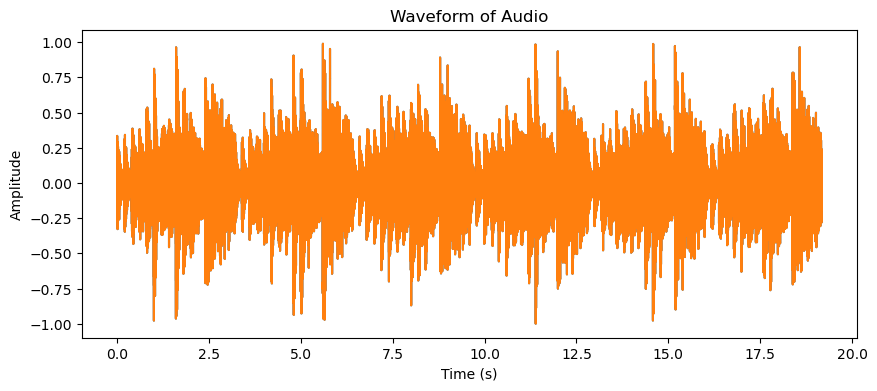

In [5]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# 读取音频文件
rate, data = wav.read("sample-15s.wav")  # 采样率 rate, 音频数据 data
data = data / np.max(np.abs(data))  # 归一化（防止溢出）

# 画出波形
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(data)/rate, len(data)), data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of Audio")
plt.show()


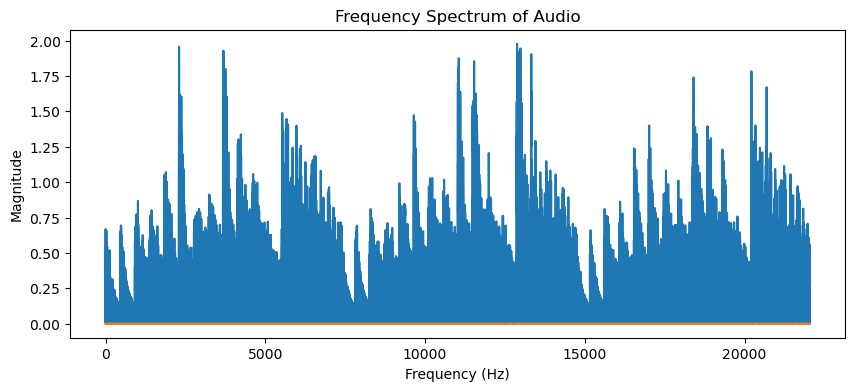

In [6]:
from scipy.fftpack import fft, fftfreq

# 计算 FFT
fft_values = fft(data)
frequencies = fftfreq(len(data), d=1/rate)  # 计算频率轴

# 画出频谱（只看正频部分）
plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values[:len(frequencies)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum of Audio")
plt.show()


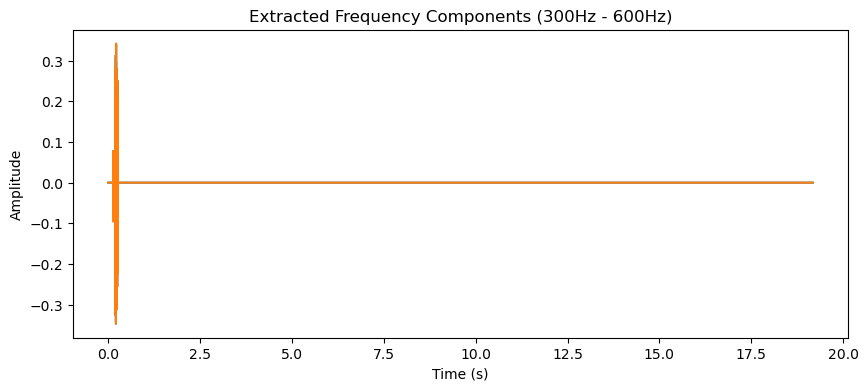

In [10]:
filtered_fft = np.zeros_like(fft_values)
filtered_fft[(frequencies > 300) & (frequencies <600)] = fft_values[(frequencies > 300) & (frequencies < 600)]

# 逆变换回时域
filtered_signal = np.real(np.fft.ifft(filtered_fft))

# 画出分离后的信号波形
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(data)/rate, len(data)), filtered_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Extracted Frequency Components (300Hz - 600Hz)")
plt.show()
